W folderze dane_testowe znajdują się pliki .WAV z nagraniami mowy. Nazwa pliku składa się z ID osoby nagranej oraz treści nagrania: 'phrase', gdy osoba mówi całą frazę oraz nazwa samogłoski, gdy wypowiada jedynie samogłoskę (w tym przypadku dodatkowo określona jest wysokość dźwięku - wysoki 'h', niski 'l' lub normalny 'n').

Utwórz listę plików, które zawierają nagrania osób o ID wymienionych poniżej:
ids_to_get = [1, 10, 95, 110, 121, 144, 676, 699, 888, 910, 1182, 1204, 1207, 1528, 1860, 1897, 1972, 2102, 2152, 2444]
Sprawdź, ile jest tych plików. Zapisz listę plików do pliku (.TXT lub dowolnego innego, np. używając funkcji np.save). Zgłoś wykonanie tej części zadania - sprawdzimy, czy jest dobrze.

In [1]:
# Zacznij tutaj od importu potrzebnych bibliotek.
from matplotlib import pyplot as plt  
import numpy as np
import os #interakcje z systemem operacyjnym
import pandas as pd #analiza danych
import pickle #zapisywanie i wczytywanie z pliku
from pathlib import Path #łatwe manipulowanie ścieżkami
from glob import glob
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.io.wavfile import read as read_wav
#Do dalszych analiz weź jedynie pliki zawierające całą frazę (a nie pojedyncze samogłoski). Utwórz listę takich plików, zapisz ją do pliku.

In [2]:
ids_to_get = [1, 10, 95, 110, 121, 144, 676, 699, 888, 910, 1182, 1204, 1207, 1528, 1860, 1897, 1972, 2102, 2152, 2444]
all_files = Path('/home/student/Desktop/Lab1/Zadania i pliki-20231010/dane_testowe').glob('*.*')
#files = [x for x in all_files if x.is_file()]

path = '/home/student/Desktop/Lab1/Zadania i pliki-20231010/dane_testowe/'
all_files = os.listdir(path)
files_with_phrase = []
files = []
for file in all_files:
    for file_id in ids_to_get:
        if file.startswith(f"{file_id}-"):
            files.append(file)
        if file.startswith(f"{file_id}-phrase"):
            files_with_phrase.append(file)

print(files)
print(files_with_phrase)

np.save(path, 'lista_plikow_o_zadanych_ID', files) #zapis do pliku .npy

['910-phrase.wav', '110-phrase.wav', '121-phrase.wav', '1897-phrase.wav', '888-phrase.wav', '888-i_l.wav', '1860-phrase.wav', '1207-phrase.wav', '676-phrase.wav', '1182-phrase.wav', '888-u_h.wav', '1528-phrase.wav', '2102-phrase.wav', '95-phrase.wav', '1204-phrase.wav', '2444-phrase.wav', '144-u_n.wav', '144-phrase.wav', '144-u_h.wav', '144-a_l.wav', '699-phrase.wav', '144-a_h.wav', '1-phrase.wav', '10-phrase.wav', '2152-phrase.wav', '1972-phrase.wav']
['910-phrase.wav', '110-phrase.wav', '121-phrase.wav', '1897-phrase.wav', '888-phrase.wav', '1860-phrase.wav', '1207-phrase.wav', '676-phrase.wav', '1182-phrase.wav', '1528-phrase.wav', '2102-phrase.wav', '95-phrase.wav', '1204-phrase.wav', '2444-phrase.wav', '144-phrase.wav', '699-phrase.wav', '1-phrase.wav', '10-phrase.wav', '2152-phrase.wav', '1972-phrase.wav']


Wczytaj pliki .WAV, które znajdują się na powyższej liście i sprawdź, jaką mają częstotliwość próbkowania, np. używając funkcji read_wav (from scipy.io.wavfile import read as read_wav https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html). 

Teraz wystarczy sprawdzić dla jednego sygnału, wszystkie mają taką samą. Przy pracy z nowymi danymi, o których tego nie wiemy, należy sprawdzić, czy na pewno częstotliwość próbkowania wszystkich sygnałów jest taka sama i w razie potrzeby ją odpowiednio zmienić.

In [3]:


files_with_phrase = [file for file in all_files if 'phrase' in file]
print(files_with_phrase)
print(len(files_with_phrase)) #dlugosc to 20 elementow

fs, signal = read_wav(path + files_with_phrase[4])
print(fs)

['910-phrase.wav', '870-phrase.wav', '110-phrase.wav', '121-phrase.wav', '1897-phrase.wav', '888-phrase.wav', '1860-phrase.wav', '1207-phrase.wav', '676-phrase.wav', '1182-phrase.wav', '1528-phrase.wav', '2102-phrase.wav', '95-phrase.wav', '1204-phrase.wav', '2444-phrase.wav', '1610-phrase.wav', '144-phrase.wav', '699-phrase.wav', '2145-phrase.wav', '1-phrase.wav', '10-phrase.wav', '2152-phrase.wav', '1972-phrase.wav']
23
16000


Wylicz i wyświetl spektrogram dowolnego sygnału, np. używając funkcji spectrogram z biblioteki scipy (from scipy.signal import spectrogram https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html). Sprawdź, jakie wymiary ma macierz zawierająca spektrogram.

(129, 111)


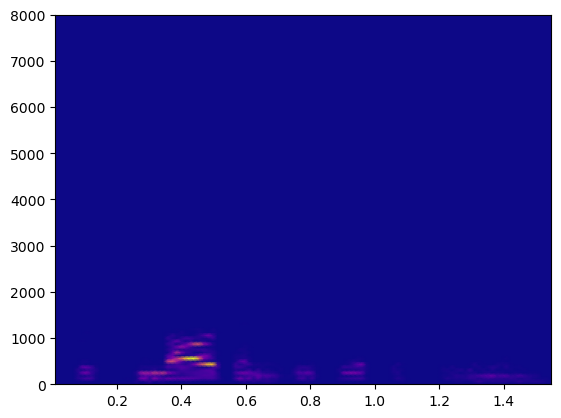

In [4]:
f, t, Sxx = spectrogram(signal, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='plasma')
print(np.shape(Sxx)) #wymiary macierzy spektogramu

Wylicz spektrogramy pozostałych sygnałów i umieść je w jednej macierzy 3D (liczba sygnałów x liczba pasm częstotliwości x liczba ramek).

Uwaga na długości sygnałów - nie są takie same, więc trzeba albo przyciąć wszystkie spektrogramy do długości liczby ramek) najkrótszego, ale wszystkie uzupełnić zerami (tzw. zero-padding) do długości najdłuższego.

In [5]:
spectrograms = []
sig_len = []
for file in files_with_phrase:
    fs, signal = read_wav(path + file)
    _, _, Sxx = spectrogram(signal, fs)
    spectrograms.append(Sxx) #dodajemy spektrogramy do listy - otrzymujemy w ten sposób listę macierzy 2D
    sig_len.append(np.shape(Sxx)[1]) #dodajemy liczbę ramek spektrogramu do listy
    
    padded_spectrograms = np.zeros((len(sig_len), spectrograms[0].shape[0], np.max(sig_len)))
for i, values in enumerate(spectrograms):
    padded_spectrograms[i, :, 0:values.shape[1]] = values
spectrograms = padded_spectrograms
spectrograms.shape

(23, 129, 201)

Plikom z nagraniami osób o ID = [110, 144, 888, 910, 1204, 1897, 1972, 2102, 2152, 2444] przyporządkuj label 1, pozostałym label 0. Wykorzystaj stworzoną wcześniej listę plików, żeby mieć pewność, że do każdego sygnału przypisany jest właściwy label (utwórz wektor zawierający labele w takiej kolejności, w jakiej są odpowiednie dane w utworzonej przed chwilą macierzy cech (spektrogramów)).

In [6]:
labels = np.zeros(len(files_with_phrase))
ID = [110, 144, 888, 910, 1204, 1897, 1972, 2102, 2152, 2444]
for count, value in enumerate(files_with_phrase): #enumerate zwraca dwie rzeczy - count, czyli indeks elementu listy
                                                #oraz value, czyli wartość tego elementu
    for i in ID:
        if value.startswith(str(i)+'-'):
            labels[count] = 1

Podziel macierz cech oraz wektor labeli na zbiór uczący i testowy w stosunku 0.8:0.2. Możesz to zrobić funkcją train_test_split z biblioteki sklearn (patrz dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split). Zadbaj o stratyfikację danych (czyli podział na zbiory w taki sposób, żeby zachowany był rozkład poszczególnych klas w obu tworzonych zbiorach). Jaki wpływ na uzyskany klasyfikator może mieć pominięcie stratyfikacji?

In [7]:
X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42, stratify=labels)

Zastanów się, czy można było zmienić kolejność dotychczas wykonanych kroków? Jeśli tak, to w jaki sposób?

"Spłaszcz" dane, żeby z dwuwymiarowego spektrogramu uzyskać wektor - większość klasyfikatorów nie przyjmuje na wejściu obrazów (danych 2D), więc ten krok jest konieczny. 

Podpowiedź: X_train powinien mieć po tej operacji wymiary 16 x 12126

In [8]:
X_train = X_train.reshape(np.shape(X_train)[0],-1) #-1 oznacza, że wszystko poza pierwszym wymiarem zostanie 
                                                    #spłaszczone do jednego wymiaru
X_test = X_test.reshape(np.shape(X_test)[0],-1)

Spróbuj wytrenować dowolny klasyfikator oraz przeprowadzić predykcję na zbiorze testowym: https://scikit-learn.org/stable/supervised_learning.html
W dokumentacji są przykłady, jak używać każdego z klasyfikatorów. W razie problemów z wyborem lub użyciem pomogę.

In [9]:
clf = KNeighborsClassifier(n_neighbors=2) #definiujemy, jaki rodzaj klasyfikatora będzie używany i ile sąsiadów
                                        #będzie brane pod uwagę podczas klasyfikacji
clf.fit(X_train, y_train) #uczenie modelu (klasyfikatora) - jego parametry zostaną teraz tak dobrane, żeby jak
                        #najlepiej klasyfikować obiekty ze zbioru uczącego
                        #fit zawsze robi się na danych ze zbioru uczącego, czyli X_train i y_train
preds = clf.predict(X_test) #predykcja - klasyfikator dostaje nowe dane, których nie widział podczas uczenia i ma
                            #teraz określić, do jakich klas wg niego te obiekty należą
                            #imitujemy sytuację, w której klasyfikator ma już być używany w praktyce i sprawdzamy,
                            #czy dobrze klasyfikuje nowe obiekty i można wierzyć jego predykcjom
print(preds)

[0. 0. 0. 0. 0.]


Zapisz klasyfikator do pliku przy użyciu pickle'a. Spróbuj go potem wczytać (przypisując go do nowej zmiennej, żeby w razie czego nie nadpisać sobie działającego modelu).

In [10]:
pickle.dump(clf, open(b"knn_model","wb")) #wb - zapisujemy do pliku binarnego
model = pickle.load(open("knn_model", "rb")) #rb - wczytujemy plik binarny

Zobacz, czy predykcje zgadzają się z rzeczywistą przynależnością do klas (wektorem y_test). Na tym etapie możesz zrobić to ręcznie lub pętlą, funkcje służące do oceny klasyfikatora poznamy później. Dla zainteresowanych już teraz: https://scikit-learn.org/stable/modules/model_evaluation.html

In [11]:
preds = model.predict(X_test)
print(preds)
print(y_test)

[0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1.]


In [12]:
from sklearn.metrics import confusion_matrix
#z dokumentacji: confusion_matrix(y_true, y_pred) - y_pred to wektor z klasami, do których klasyfikator 
                                                    #przyporządkował obiekty, a y_true to wektor zawierający
                                                    #rzeczywiste klasy, czyli y_test
    
#tu użyj funkcji i wyznacz macierz pomyłek. Wyświetl ją i zobacz, jak poradził sobie wytrenowany klasyfikator.
confusion_matrix(y_test, preds)

array([[3, 0],
       [2, 0]])

In [13]:
#można też zrobić tak, wtedy od razu są przypisane wartości do TP, TN, FP i FN
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print('TN = ', tn, ' FP = ', fp, ' FN = ', fn, ' TP = ', tp)

TN =  3  FP =  0  FN =  2  TP =  0


In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
f1 = f1_score(y_test, preds)
print('accuracy = ', accuracy, ' recall = ', recall, ' precision = ', precision, ' F1 = ', f1)

accuracy =  0.6  recall =  0.0  precision =  0.0  F1 =  0.0


/home/student/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
